# 1️⃣ Load the Dataset

- Import Pandas and read the CSV file.
- Display the first few rows.
- Check the column names and data types.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
titanic_data = pd.read_csv("tested.csv")

In [45]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [46]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [47]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 2️⃣ Data Cleaning

- Identify and handle missing values in Age, Cabin, and Fare.
- Drop unnecessary columns like Cabin (too many missing values).
- Fill missing Age with median.
- Fill missing Fare with mode.

In [48]:
# Changed the missing value in Fare column with its mode value
ModeofFare = float(titanic_data.Fare.mode())
titanic_data["Fare"] = titanic_data["Fare"].fillna(ModeofFare)

C:\Users\Shaurya Srivastava\AppData\Local\Temp\ipykernel_23092\2912493460.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ModeofFare = float(titanic_data.Fare.mode())


In [49]:
#It Contained too many null values too i deleted it
del titanic_data['Cabin']

In [50]:
# changed the missing values in Age column with its median value
medianofAge = float(titanic_data["Age"].median())
titanic_data["Age"] = titanic_data["Age"].fillna(medianofAge)

In [51]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


# 3️⃣ Exploratory Data Analysis(EDA)

📌 Survival Rate Analysis<br>
- What percentage of passengers survived?

📌 Gender and Survival
- Find the survival rate by gender.
- Use a bar chart to compare male vs. female survival.

📌 Passenger Class and Survival
- Find survival rate for 1st, 2nd, and 3rd class.
- Use a bar chart to visualize it.

📌 Age Distribution of Survivors
- Plot age distribution for survivors vs. non-survivors.
- Use a histogram or KDE plot.

In [52]:
# Survival Rate Analysis
passengersSurvived = titanic_data[titanic_data["Survived"] == 1].shape
passengersnotSurvived = titanic_data[titanic_data["Survived"] == 0].shape
passengersSurvived = passengersSurvived[0]
passengersnotSurvived = passengersnotSurvived[0]
totalPassengers = passengersSurvived + passengersnotSurvived

In [53]:
percentageSurvived = (passengersSurvived/totalPassengers) * 100
percentagenotSurvived = (passengersnotSurvived/totalPassengers) * 100

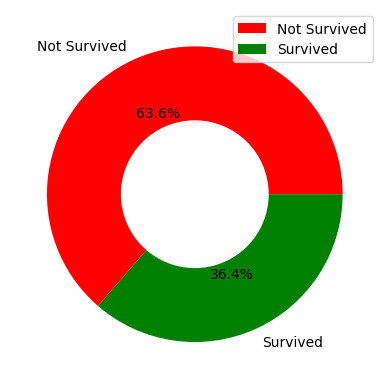

In [54]:
plt.pie([percentagenotSurvived,percentageSurvived],
        labels=["Not Survived", "Survived"],
        colors=["red", "Green"],
        autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend()
plt.show()

In [55]:
# Gender vs Survival
maleSurvived = titanic_data.loc[(titanic_data["Survived"] == 1) & (titanic_data["Sex"] == "male"),["Survived","Sex"]].shape
malenotSurvived = titanic_data.loc[(titanic_data["Survived"] == 0) & (titanic_data["Sex"] == "male"),["Survived","Sex"]].shape
femaleSurvived = titanic_data.loc[(titanic_data["Survived"] == 1) & (titanic_data["Sex"] == "female"),["Survived","Sex"]].shape
femalenotSurvived = titanic_data.loc[(titanic_data["Survived"] == 0) & (titanic_data["Sex"] == "female"),["Survived","Sex"]].shape

In [56]:
male_survived = maleSurvived[0]
male_not_survived = malenotSurvived[0]
female_survived = femaleSurvived[0]
female_not_survived = femalenotSurvived[0]

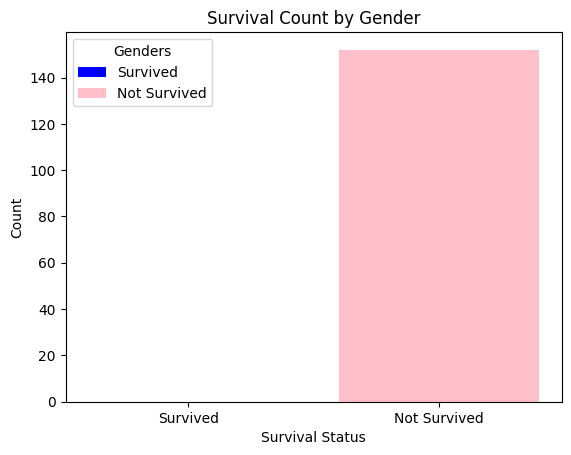

In [57]:
categories = ['Survived', 'Not Survived']
count = [male_survived,female_survived]
# Plot
fig, ax = plt.subplots()
ax.bar(categories, count,label=categories,color=["Blue","Pink"])
# Add labels, title, and legend
ax.set_xlabel('Survival Status')
ax.set_ylabel('Count')
ax.set_title('Survival Count by Gender')
ax.legend(title = "Genders")

# Show plot
plt.show()

In [58]:
# Survival vs Class
survivedfirst = titanic_data[(titanic_data["Survived"] == 1) & (titanic_data["Pclass"] == 1)].shape[0]
survivedsecond = titanic_data[(titanic_data["Survived"] == 1) & (titanic_data["Pclass"] == 2)].shape[0]
survivedthird = titanic_data[(titanic_data["Survived"] == 1) & (titanic_data["Pclass"] == 3)].shape[0]

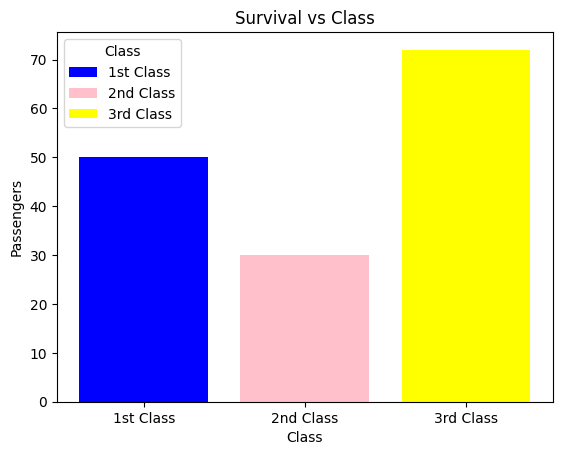

In [59]:
fig,ax = plt.subplots()
categories = ["1st Class", "2nd Class", "3rd Class"]
count = [survivedfirst,survivedsecond,survivedthird]
ax.bar(categories, count,label=categories, color = ["blue","pink","yellow"])
# Add labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Passengers')
ax.set_title('Survival vs Class')
ax.legend(title = "Class")
plt.show()

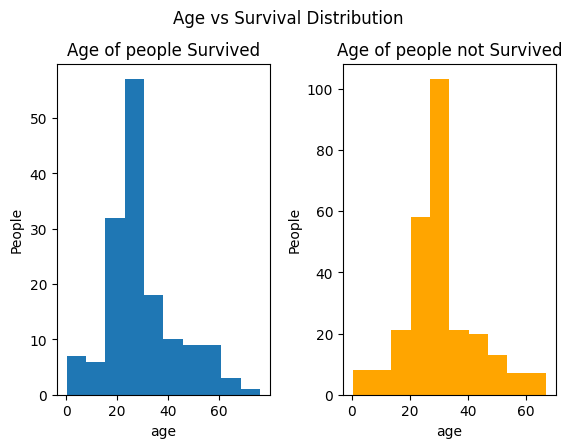

In [60]:
# Age vs Survival
survivors = list(titanic_data[titanic_data["Survived"] == 1]["Age"])
nonSurvivors = list(titanic_data[titanic_data["Survived"] == 0]["Age"])

# Survivors
plt.subplot(1,2,1)
plt.tight_layout()
plt.hist(survivors)
plt.title("Age of people Survived")
plt.ylabel("People")
plt.xlabel("age")

# Non Survivors
plt.subplot(1,2,2)
plt.tight_layout(pad=3)
plt.hist(nonSurvivors,color="orange")
plt.title("Age of people not Survived")
plt.ylabel("People")
plt.xlabel("age")

plt.suptitle("Age vs Survival Distribution")
plt.show()

# 4️⃣ Feature Engineering (Optional)

- Convert Sex into integer (0 = Male, 1 = Female).
- Convert Embarked into numerical categories.

In [ ]:
titanic_data["Sex"] = titanic_data["Sex"].apply(lambda x: 0 if x == "male" else 1)
titanic_data["Embarked"] = titanic_data["Embarked"].apply(lambda x: ord(x))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,81
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,83
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,81
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,83
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,83
